In [1]:
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/Kletenik_UnknownProject/results/notebook_08/rois_to_convergent_map'

# 01 - Get First Set of Maps 
- These are the maps you have generated yourself and want to evaluate

Enter the path to the dictionary generated by Notebook 01

In [2]:
dict_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_01/redo/rois/tmp/dataset_dict.json'

**Option A - Import Files Using JSON File**

In [3]:
from calvin_utils.ccm_utils.npy_utils import DataLoader
data_loader = DataLoader(dict_path)

# 02 - Get Maps to Compare Against

Enter the path to the nifti files
- import_path = '/path/to/folder/holding/files'
- file_pattern = 'the_specific_naming_pattern.nii'
- If unfamiliar with use, read about Glob: https://www.geeksforgeeks.org/how-to-use-glob-function-to-find-files-recursively-in-python/

In [4]:
import_path2 = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_07/redo3/conn/optimized'
file_pattern2 = 'optimized_convergent_map.nii.gz'

In [5]:
from calvin_utils.file_utils.import_functions import GiiNiiFileImport
indep_var_df = GiiNiiFileImport(import_path=import_path2, file_pattern=file_pattern2).run()
indep_var_df

Attempting to import from: /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_07/redo3/conn/optimized/optimized_convergent_map.nii.gz


,/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_07/redo3/conn/optimized/optimized_convergent_map.nii.gz
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
902624,0.0
902625,0.0
902626,0.0
902627,0.0


# 03 - Measure Similarity

Log file saved to: /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/Kletenik_UnknownProject/results/notebook_08/rois_to_convergent_map/stat_results.txt


,0,1,2,3,4,5,6,7,8,9,...,854,855,856,857,858,859,860,861,mean_similarity,std_err
adni_Alzheimer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
corbetta_memory,-0.001885,0.001964,-0.015533,0.001672,0.010223,0.025311,0.021428,0.025359,-0.010033,0.005018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015759,0.003695
fornix_memory,-0.018500,-0.004275,-0.015267,-0.030480,-0.011938,-0.021934,-0.018465,0.008583,-0.009081,-0.020643,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.018891,0.001373
grafmann_memory,-0.028856,0.039620,0.019434,-0.014568,0.002948,0.023275,0.037504,-0.037963,-0.000039,0.034103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010870,0.006494
hebscher_tms,-0.017416,-0.004750,-0.024146,-0.019714,-0.021821,-0.017660,-0.017965,-0.018312,-0.018536,-0.019069,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.018474,0.000957
hermiller_tms_a1,-0.001484,-0.014869,-0.015981,-0.015089,-0.011409,-0.014136,-0.016009,-0.012657,-0.011034,-0.015961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.012526,0.001050
hermiller_tms_b,-0.014409,-0.011639,-0.013302,-0.015757,-0.009616,-0.013862,-0.003114,-0.004279,-0.009088,-0.006801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007715,0.001000
kahana_memory_enhance,-0.010436,-0.013146,-0.012703,-0.011739,0.005666,-0.004468,-0.011436,-0.007613,-0.008560,-0.001877,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005421,0.001028
kahana_memory_lesion,-0.010436,-0.013146,-0.012703,-0.011739,0.005666,-0.004468,-0.011436,-0.007613,-0.008560,-0.001877,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005421,0.001028
kahana_random_stim,-0.541492,-0.735307,-0.530531,-0.499216,0.510240,-0.176705,-0.788702,-0.265058,-0.369103,-0.066818,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.420742,0.051555


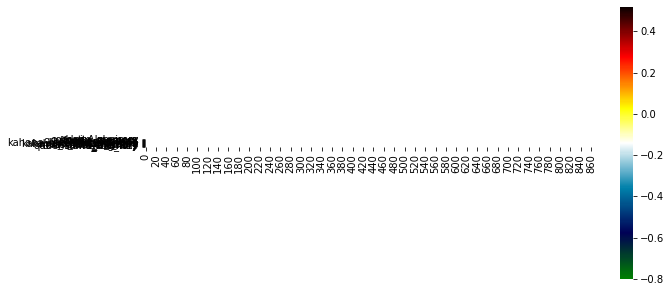

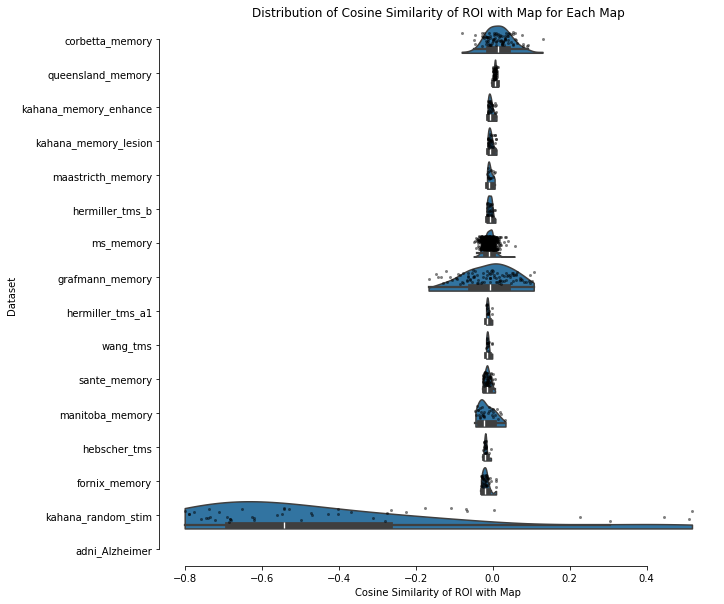

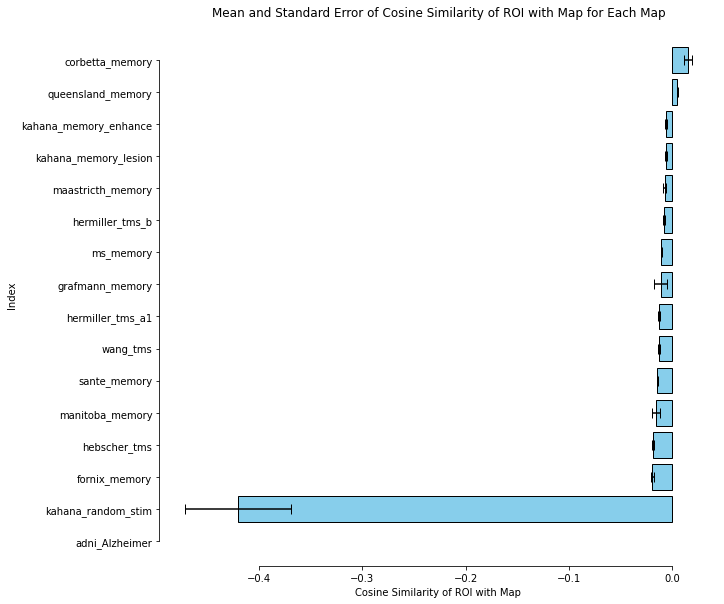

In [6]:
from calvin_utils.ccm_utils.similarity_utils import MapComparator
simtest = MapComparator(data_loader, indep_var_df, out_dir=out_dir, 
                        mask_path='/Users/cu135/hires_backdrops/MNI/MNI152_T1_2mm_brain_mask.nii', 
                        method_choice='damage', 
                        align=False, reference=None, flip_list=[])
simtest.run(similarity='cosine')